In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings

# Gereksiz uyarıları kapat
warnings.filterwarnings('ignore')

# Grafik Ayarları (Daha profesyonel görünüm için)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [2]:
def load_full_data(source_file='academicPerformanceData.xlsx'):
    print("📊 Veri Analizi Başlıyor...")
    # Veriyi Oku ve Temizle (Standart Prosedür)
    try:
        df = pd.read_excel(source_file, header=1)
    except:
        df = pd.read_excel(source_file)
        
    df = df.dropna(axis=1, how='all')
    if len(df.columns) > 8: df = df.iloc[:, :8]
    df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'Remarks']
    df['Remarks'] = df['Remarks'].astype(str).str.replace('Class', '').str.strip()
    df = df[df['Remarks'].apply(lambda x: x.isdigit())]
    df['Remarks'] = df['Remarks'].astype(int)
    return df

df = load_full_data()

📊 Veri Analizi Başlıyor...


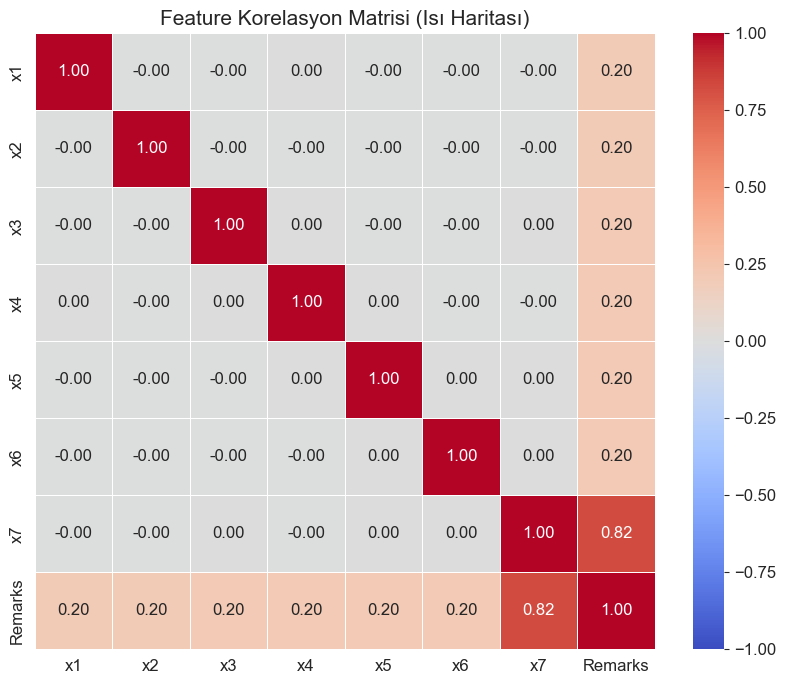

In [3]:
# ---------------------------------------------------------
# 1. KORELASYON ANALİZİ (Correlation Heatmap)
# PDF Madde: i. correlation coefficients of the inputs and the output
# ---------------------------------------------------------
plt.figure(figsize=(10, 8))
# Korelasyon matrisini hesapla
corr_matrix = df.corr()

# Isı haritası çiz
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Korelasyon Matrisi (Isı Haritası)', fontsize=15)
plt.show()



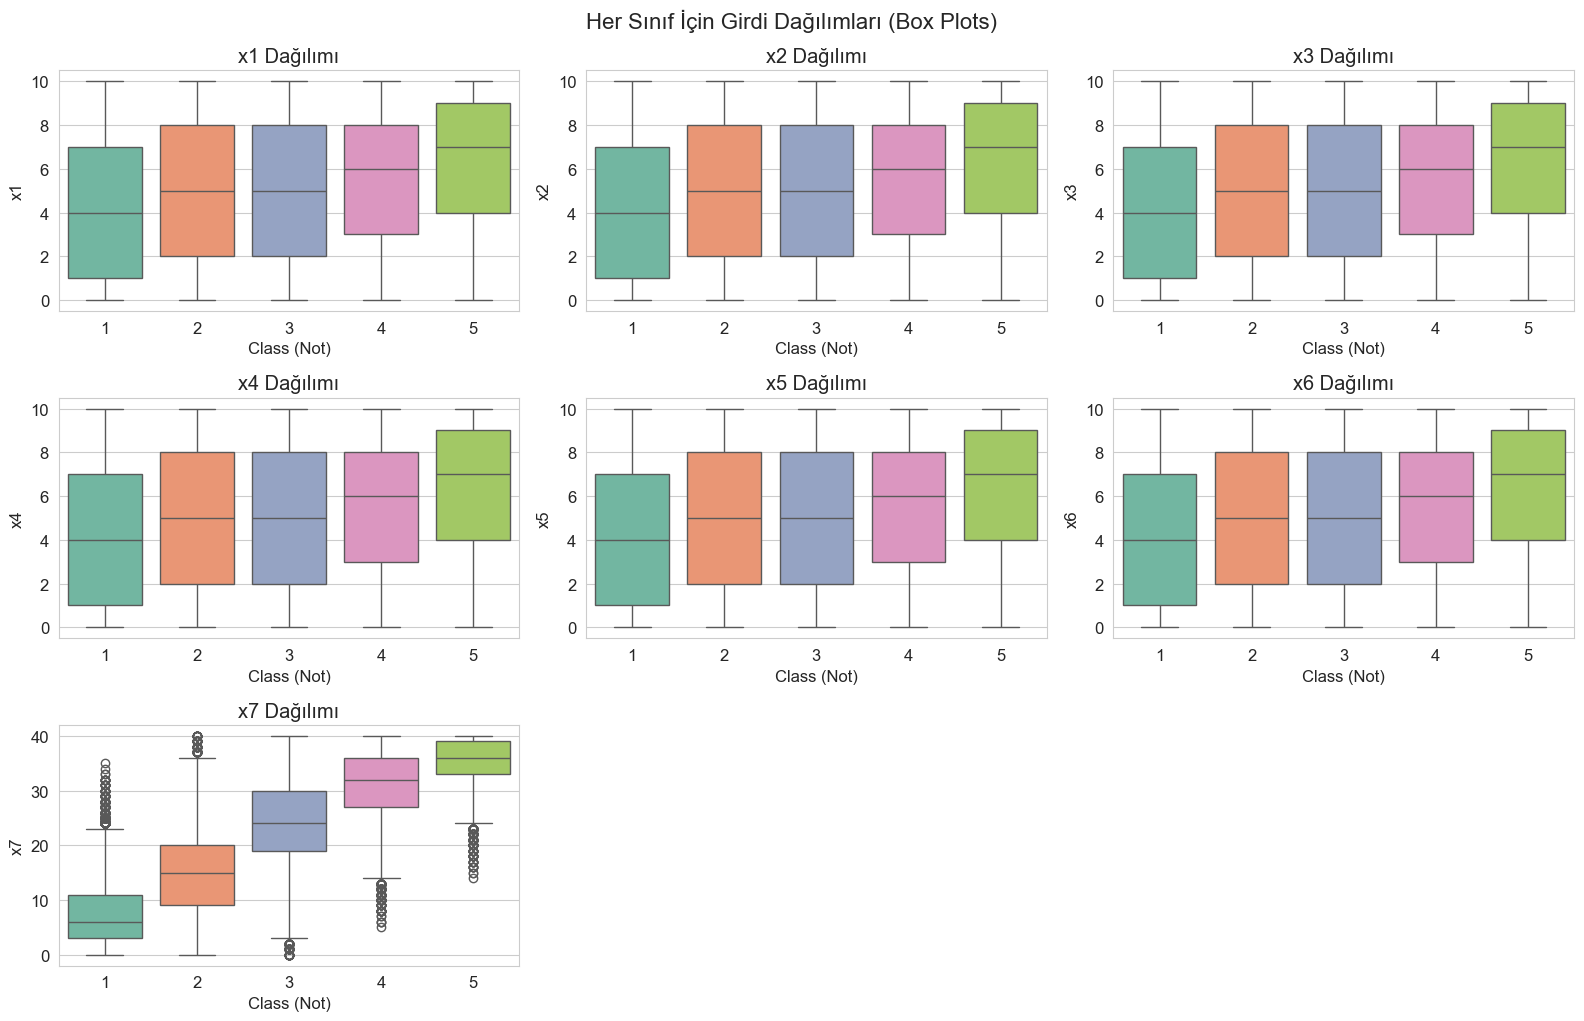

In [4]:
# ---------------------------------------------------------
# 2. SINIF DAĞILIMLARI (Box Plots)
# Hangi özellik sınıfları daha iyi ayırıyor?
# ---------------------------------------------------------
plt.figure(figsize=(16, 10))
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Remarks', y=col, data=df, palette="Set2")
    plt.title(f'{col} Dağılımı')
    plt.xlabel('Class (Not)')

plt.tight_layout()
plt.suptitle('Her Sınıf İçin Girdi Dağılımları (Box Plots)', y=1.02, fontsize=16)
plt.show()

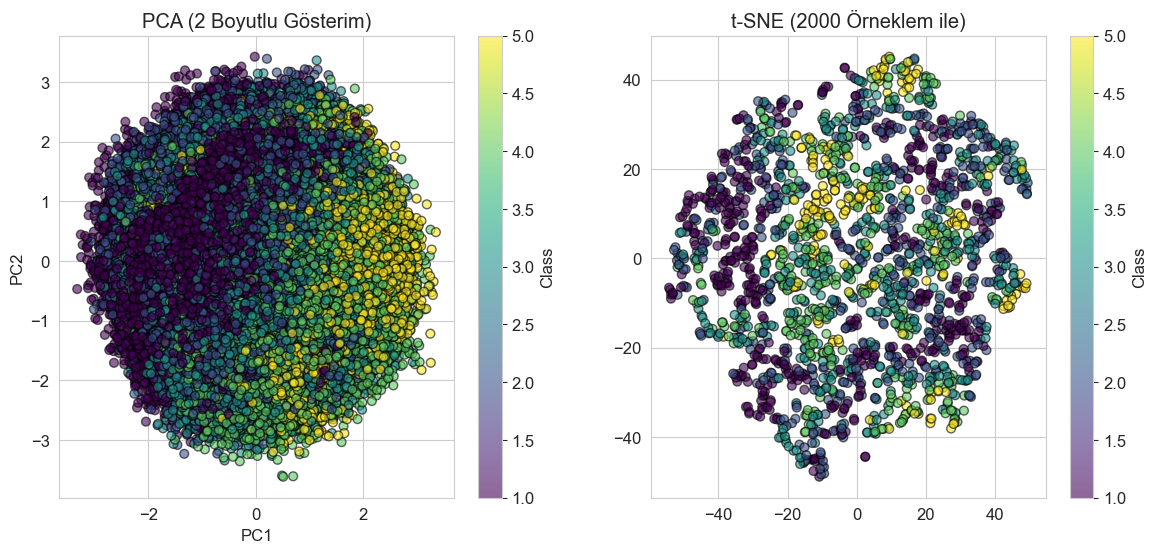

In [5]:
# ---------------------------------------------------------
# 3. BOYUT İNDİRGEME VE GÖRSELLEŞTİRME (PCA & T-SNE)
# Veri 2 boyutta nasıl görünüyor? Kümeler ayrışıyor mu?
# ---------------------------------------------------------
# Veriyi ölçekle (Standardizasyon)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Remarks', axis=1))
y = df['Remarks']

# A) PCA (Principal Component Analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolor='k', s=40)
plt.colorbar(scatter, label='Class')
plt.title('PCA (2 Boyutlu Gösterim)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# B) T-SNE (Daha karmaşık ilişkileri gösterir)
# T-SNE büyük veride yavaş olabilir, örneklem alarak yapıyoruz (örn: 2000 veri)
sample_size = min(2000, len(df))
indices = np.random.choice(len(df), sample_size, replace=False)
X_tsne_input = X_scaled[indices]
y_tsne = y.iloc[indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_tsne_input)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tsne, cmap='viridis', alpha=0.6, edgecolor='k', s=40)
plt.colorbar(scatter2, label='Class')
plt.title(f't-SNE ({sample_size} Örneklem ile)')

plt.show()

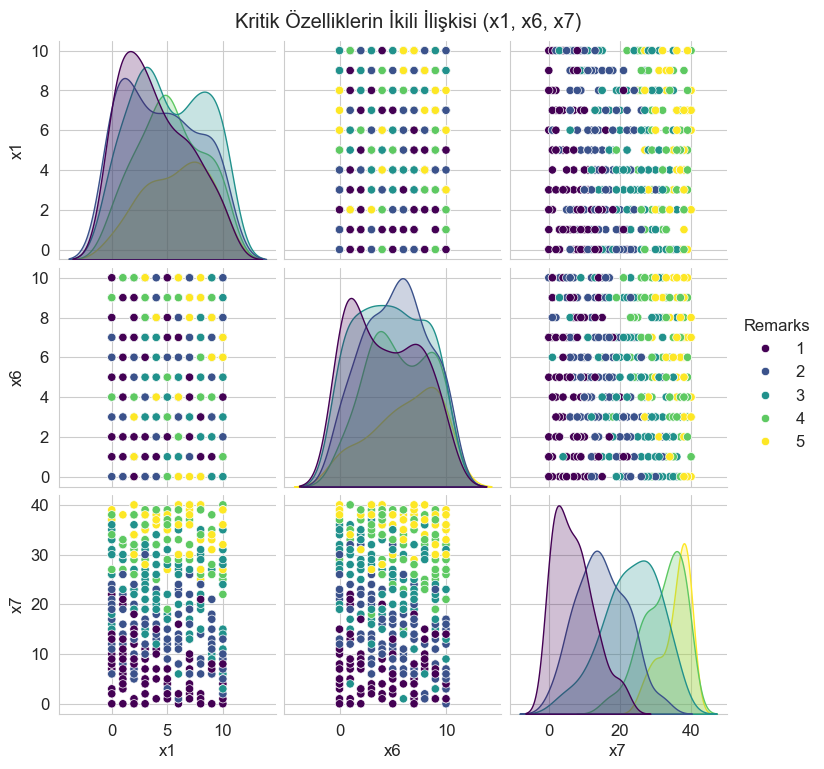

In [6]:
# ---------------------------------------------------------
# 4. PAIRPLOT (İkili İlişkiler)
# ---------------------------------------------------------
# Veri çok büyükse pairplot kasar, 500'lük örneklem alalım
subset_df = df.sample(n=min(500, len(df)), random_state=42)
sns.pairplot(subset_df, hue='Remarks', vars=['x1', 'x6', 'x7'], palette='viridis')
plt.suptitle('Kritik Özelliklerin İkili İlişkisi (x1, x6, x7)', y=1.02)
plt.show()